In [1]:
#Loading the IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

2024-01-02 04:07:07.830713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

decoded_review = " ".join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
#Encoding the integer sequence into binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension = int(10000)):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
#Model Defination

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-01-02 04:07:13.027250: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Activation Function adds non-linearity in data transformation into higher dimensional space which provides access to much richer hypothesis space that would benifit from deep representation.

In [11]:
#Compiling the Model

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

In [12]:
#Configuring the Optimizers and Using Custom losses and metrics

from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
trained_model = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5038 - binary_accuracy: 0.7929 - val_loss: 0.3778 - val_binary_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2981 - binary_accuracy: 0.9045 - val_loss: 0.3519 - val_binary_accuracy: 0.8535
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2228 - binary_accuracy: 0.9263 - val_loss: 0.2780 - val_binary_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1757 - binary_accuracy: 0.9428 - val_loss: 0.2979 - val_binary_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1415 - binary_accuracy: 0.9575 - val_loss: 0.3090 - val_binary_accuracy: 0.8775
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1187 - binary_accuracy: 0.9637 - val_loss: 0.2950 - val_binary_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

In [16]:
trained_model_dict = trained_model.history
trained_model_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

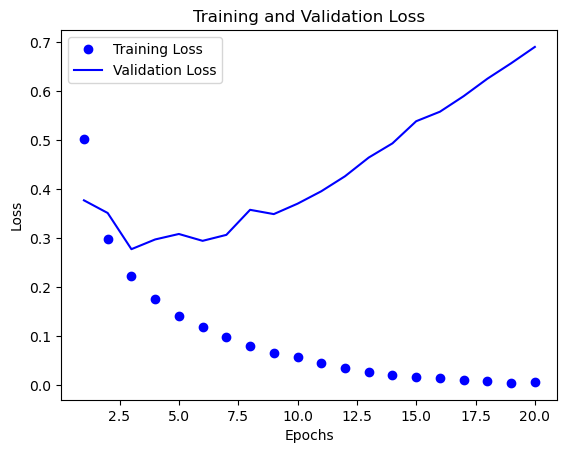

In [17]:
import matplotlib.pyplot as plt

loss_value = trained_model_dict['loss']
val_loss_value = trained_model_dict['val_loss']

epochs = range(1,len(loss_value)+1)

plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

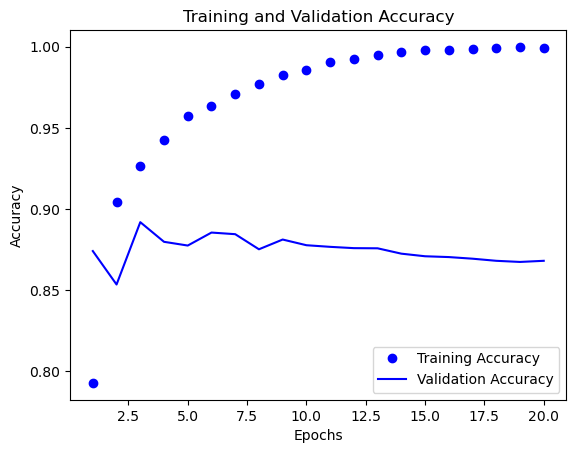

In [18]:
acc_values = trained_model_dict['binary_accuracy']
val_acc_values = trained_model_dict['val_binary_accuracy']


plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see validation loss and validation accuracy peaks at fourth epoch which shows even though accuracy and loss are decreasing in training set, it is overfitting data after fourth epoch

In [19]:
#Retraining the model from scratching to eliminate overfitting only training upto fourth epoch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.fit(x_train,y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4875 - binary_accuracy: 0.8208
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2746 - binary_accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2057 - binary_accuracy: 0.9263
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2913 - binary_accuracy: 0.8843


In [20]:
results

[0.29134470224380493, 0.8842800259590149]

In [ ]:
model.predict(x_test)

In [21]:
results

[0.29134470224380493, 0.8842800259590149]